Kütüphaneleri import et

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

İlk önce verisetini zip formatında google drive yüklememiz gerekiyor
colab ekranından soldan dosyalar kısmından drive yükle kısmını seçiyoruz
Drive dan yüklediğimiz kısım content dizini içerisine geliyor.
Zipli dosyayı zipden çıkartmamız lazım bunun için zipli dosyaya sağ tıklayıp yolu kopyala diyip unzip komutundan sonrasına ekliyoruz.

verisetini zipden çıkart

In [ ]:
! unzip /content/drive/MyDrive/veriSeti.zip

Archive:  /content/drive/MyDrive/veriSeti.zip
   creating: veriSeti/
  inflating: veriSeti/README.md      
   creating: veriSeti/test/
   creating: veriSeti/test/maskeli/
  inflating: veriSeti/test/maskeli/1-with-mask.jpg  
  inflating: veriSeti/test/maskeli/106-with-mask.jpg  
  inflating: veriSeti/test/maskeli/11-with-mask.jpg  
  inflating: veriSeti/test/maskeli/110-with-mask.jpg  
  inflating: veriSeti/test/maskeli/111-with-mask.jpg  
  inflating: veriSeti/test/maskeli/114-with-mask.jpg  
  inflating: veriSeti/test/maskeli/121-with-mask.jpg  
  inflating: veriSeti/test/maskeli/127-with-mask.jpg  
  inflating: veriSeti/test/maskeli/141-with-mask.jpg  
  inflating: veriSeti/test/maskeli/146-with-mask.jpg  
  inflating: veriSeti/test/maskeli/157-with-mask.jpg  
  inflating: veriSeti/test/maskeli/160-with-mask.jpg  
  inflating: veriSeti/test/maskeli/165-with-mask.jpg  
  inflating: veriSeti/test/maskeli/167-with-mask.jpg  
  inflating: veriSeti/test/maskeli/174-with-mask.jpg  
  infla

Klasör yollarını belirler

In [ ]:
import os
main_dir = '/content/veriSeti'
train_dir = os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
valid_dir = os.path.join(main_dir,'val')

train_maskeli_dir = os.path.join(train_dir,'maskeli')
train_maskesiz_dir = os.path.join(train_dir,'maskesiz')

In [ ]:
train_maskeli = os.listdir(train_maskeli_dir)
print(train_maskeli[:10])

train_maskesiz = os.listdir(train_maskesiz_dir)
print(train_maskesiz[:10])

['313-with-mask.jpg', 'augmented_image_310.jpg', '189-with-mask.jpg', 'augmented_image_189.jpg', 'augmented_image_30.jpg', '138-with-mask.jpg', 'augmented_image_277.jpg', '8-with-mask.jpg', 'HTB1jE7ILFXXXXaEXpXXq6xXFXXXd.jpg', 'Flu-Face-Mask-1.jpg']
['923666b49a777e3dcc2ca902496e6e5d.jpg', '124.jpg', '352.jpg', 'augmented_image_310.jpg', '294.jpg', 'augmented_image_189.jpg', '125.jpg', '329.jpg', 'augmented_image_30.jpg', '4.jpg']


Resimleri Görmek için
#Bunlar sistemin çalışıp çalışmadığını test amaçlı
Görünmesi açısından 4 adet maskeli
4 adet maskesiz


['/content/veriSeti/train/maskeli/313-with-mask.jpg', '/content/veriSeti/train/maskeli/augmented_image_310.jpg', '/content/veriSeti/train/maskeli/189-with-mask.jpg', '/content/veriSeti/train/maskeli/augmented_image_189.jpg', '/content/veriSeti/train/maskeli/augmented_image_30.jpg', '/content/veriSeti/train/maskeli/138-with-mask.jpg', '/content/veriSeti/train/maskeli/augmented_image_277.jpg', '/content/veriSeti/train/maskeli/8-with-mask.jpg']
['/content/veriSeti/train/maskesiz/923666b49a777e3dcc2ca902496e6e5d.jpg', '/content/veriSeti/train/maskesiz/124.jpg', '/content/veriSeti/train/maskesiz/352.jpg', '/content/veriSeti/train/maskesiz/augmented_image_310.jpg', '/content/veriSeti/train/maskesiz/294.jpg', '/content/veriSeti/train/maskesiz/augmented_image_189.jpg', '/content/veriSeti/train/maskesiz/125.jpg', '/content/veriSeti/train/maskesiz/329.jpg']


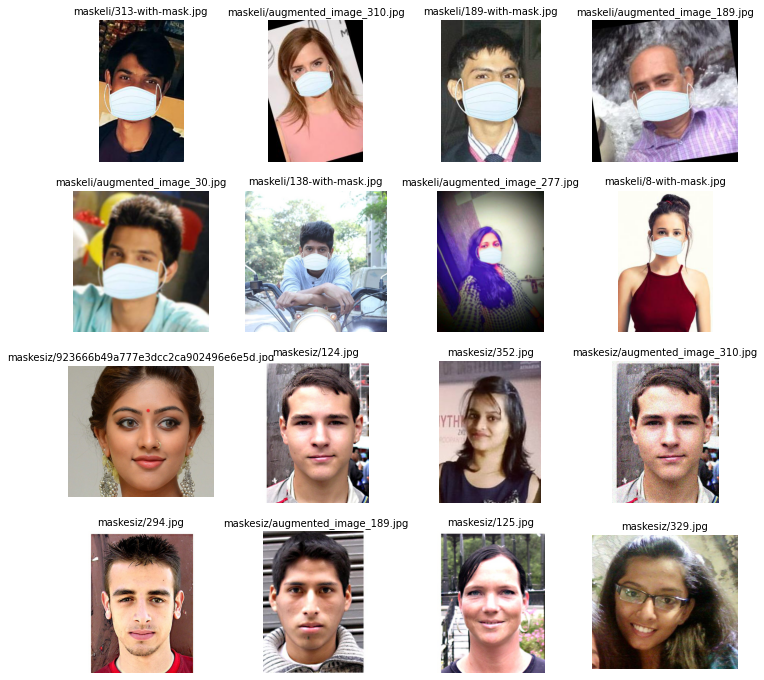

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_maskeli[0:8]:
  mask_pic.append(os.path.join(train_maskeli_dir,i))

maskesiz_pic = []
for i in train_maskesiz[0:8]:
  maskesiz_pic.append(os.path.join(train_maskesiz_dir,i))

print(mask_pic)
print(maskesiz_pic)

merged_pics = mask_pic+maskesiz_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()
  


*****************

Burada resimleri klasörlere göre augment yapıyor.
Yani veri setini artırmak için veri artırımına gidiyor.
Örnek olarak sola dönük resmi sağa döndürüyor veya
yaklaştırıp uzaklaştırarak mevcut verisetini artırıyor

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


Eğitim sonunda modelimiz maskeliler için "0"
maskesizler için "1" sonucunu döndürecektir

In [ ]:
train_generator.class_indices

{'maskeli': 0, 'maskesiz': 1}

Eğitim alıncak resim boyutlar
rgb kanalda 150x150 boyutlarında

In [ ]:
train_generator.image_shape

(150, 150, 3)

Keras ile model oluşturuyoruz. Oluşturduğumuz model 22,449,601 parametreden oluşmaktadır. İlk 2 katman konvolisyon katmanı son katman ise dense katmanından oluşmaktadır...


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

Modeli derlediğimiz(compile) ettiğimiz bölüm. 

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

**Modeli eğitime başlatıyoruz**
30 tur eğitim olacak
Burda loss hatamız
Accuracy doğruluk
Val_ Accuracy validation doğrulaması

Burada accuracy ile val accuracy nin bir birine yakın olması önemli

---



In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
42/42 [==============================] - 56s 1s/step - loss: 2.1676 - accuracy: 0.5065 - val_loss: 0.6662 - val_accuracy: 0.7746
Epoch 2/30
42/42 [==============================] - 55s 1s/step - loss: 0.3989 - accuracy: 0.8259 - val_loss: 0.2353 - val_accuracy: 0.9577
Epoch 3/30
42/42 [==============================] - 55s 1s/step - loss: 0.2269 - accuracy: 0.9262 - val_loss: 0.1801 - val_accuracy: 0.9577
Epoch 4/30
42/42 [==============================] - 55s 1s/step - loss: 0.1628 - accuracy: 0.9422 - val_loss: 0.1322 - val_accuracy: 0.9577
Epoch 5/30
42/42 [==============================] - 55s 1s/step - loss: 0.1472 - accuracy: 0.9536 - val_loss: 0.1505 - val_accuracy: 0.9577
Epoch 6/30
42/42 [==============================] - 55s 1s/step - loss: 0.1229 - accuracy: 0.9536 - val_loss: 0.1050 - val_accuracy: 0.9577
Epoch 7/30
42/42 [==============================] - 55s 1s/step - loss: 0.1419 - accuracy: 0.9490 - val_loss: 0.0928 - val_accuracy: 0.9718
Epoch 8/30
42/42 [==

Eğitim için kullanılan anahtar kelimeler

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Kayıpların yani loss değerlerinin grafiğini çizdiriyoruz.
Belli bir düşmeden sonra kayıp verilerimiz düzleşiyor

Text(0.5, 0, 'epoch')

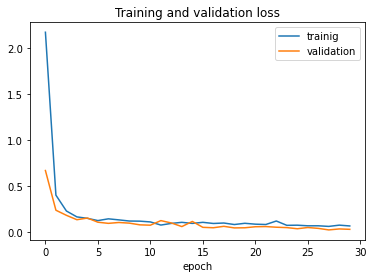

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Şimdi de modelimizin doğruluk grafiğini çizdiriyoruz.
Model kısa sürede % 95 lere çıkıyor ve artık eğirimiz düzleşiyor

Text(0.5, 0, 'epoch')

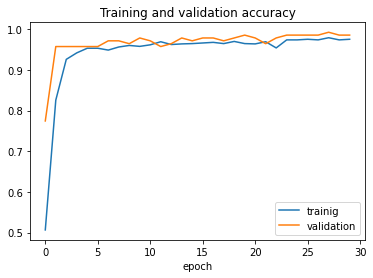

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

Doğruluk ve kayıp değerlerimizi ekrana yazdırıyoruz.
Yaklaşık % 98 oranında bir doğruluk oranımız var
Bu değer maske tespiti için gayet iyi sayılır.

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test Doğruluk :{} test Kayıp:{}'.format(test_acc,test_loss))

7/7 [==============================] - 2s 249ms/step - loss: 0.0476 - accuracy: 0.9794
test Doğruluk :0.9793814420700073 test Kayıp:0.047649987041950226


Şimdi Modelimizi kaydediyoruz.
Modelimize isim veriyoruz.

In [ ]:
model.save("maske.h5")

Şimdi soldan klasörlerden maske.h5
dosyasını indirip modelimizde kullanabiliriz.